# Project: Investigate the TMDB dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will be doing data analysis on the TMDB dataset. In particular I want to know what variables are associated with popular movies and also who are the best directors.

## Questions
<ul>
<li>From 2005 to 2015, what year had the best movies?</li>
<li>Which genres generated the most revenue?</li>
<li>Which genres have the highest budgets?</li>
<li>What variables are associated with great movies?</li>
<li>Is there a correlation between Runtime and Revenue?</li>
<li>What is the average runtime of each genre?</li>
</ul>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
(df['budget'] == 0).sum()

5696

In [8]:
(df['revenue'] == 0).sum()

6016

In [9]:
df.duplicated().sum()

1

# Data Wrangling overview

#### Column removal
I'm going to remove these columns as they are unecessary for this data analysis
<ul>
<li>id</li>
<li>imdb_id</li>
<li>homepage</li>
<li>director</li>
<li>tagline</li>
<li>cast</li>
<li>production_companies</li>
<li>overview</li>
<li>keywords</li>
</ul>

In [10]:
df.drop(columns=(['id', 'imdb_id', 'homepage', 'director', 'tagline', 'cast','production_companies', 'overview', 'keywords']), inplace=True)

I drop any remaining null values in the dataset

In [11]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

I drop any duplicates in the dataset

In [14]:
df.duplicated().sum()

1

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

#### Replacing rows where budget and revenue is 0 with Nan:

The reason why I decided to do this is that replacing 0 values with the mean would not reflect the data. I would prefer they would be excluded from the analysis. Also, that row could still have value for other columns like vote_average.

In [17]:
df['budget'].replace(0, np.nan, inplace=True)
df['budget_adj'].replace(0, np.nan, inplace=True)
df['revenue'].replace(0, np.nan, inplace=True)
df['revenue_adj'].replace(0, np.nan, inplace=True)

In [18]:
df.tail()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,0.080598,NaN,NaN,The Endless Summer,95,Documentary,6/15/66,11,7.4,1966,NaN,NaN
10862,0.065543,NaN,NaN,Grand Prix,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,NaN,NaN
10863,0.065141,NaN,NaN,Beregis Avtomobilya,94,Mystery|Comedy,1/1/66,11,6.5,1966,NaN,NaN
10864,0.064317,NaN,NaN,"What's Up, Tiger Lily?",80,Action|Comedy,11/2/66,22,5.4,1966,NaN,NaN
10865,0.035919,19000.0,NaN,Manos: The Hands of Fate,74,Horror,11/15/66,15,1.5,1966,127642.279154,NaN


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: From 2005 to 2015, what year had the best movies?

In [19]:
movies_from_2005_to_2015_df = df.query('release_year >= 2005')

In [20]:
movies_from_2005_to_2015_df.release_year.value_counts().sort_index(ascending=False)

2015    627
2014    699
2013    656
2012    584
2011    540
2010    487
2009    531
2008    495
2007    438
2006    408
2005    363
Name: release_year, dtype: int64

In [21]:
def Plot(df,plotVar,axisVar, stat='mean', color='steelblue',figsize=[14,6]):
    df.groupby(plotVar)[axisVar].agg(stat).plot.bar(figsize=figsize,rot=0,width=0.6,color=color);
    if isinstance(axisVar, list):
        axisVar=' & '.join([x.replace('_',' ') for x in axisVar])
    else:
        axisVar=axisVar.replace('_',' ')
    plotVar=plotVar.replace('_',' ')
    plt.title('{} by {}'.format(axisVar, plotVar).title())
    plt.xlabel(plotVar.title())
    plt.ylabel('{} {}'.format(stat, axisVar).title())

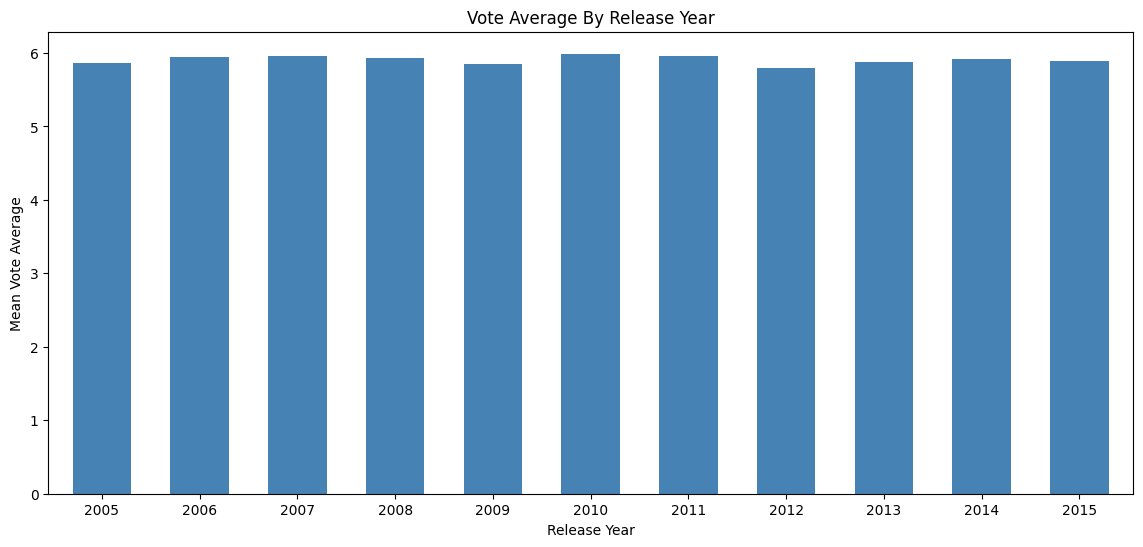

In [22]:
Plot(movies_from_2005_to_2015_df,'release_year','vote_average')

It seems that vote average has roughly stayed the same from 2005 to 2015

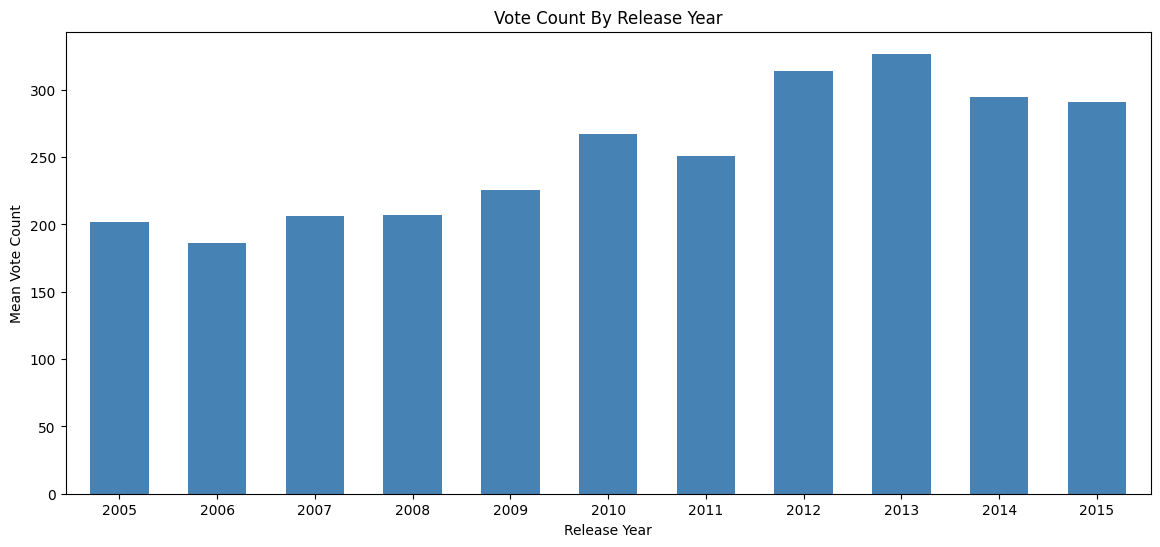

In [23]:
Plot(movies_from_2005_to_2015_df,'release_year', 'vote_count')

Vote count seems to have gradually increased over time.

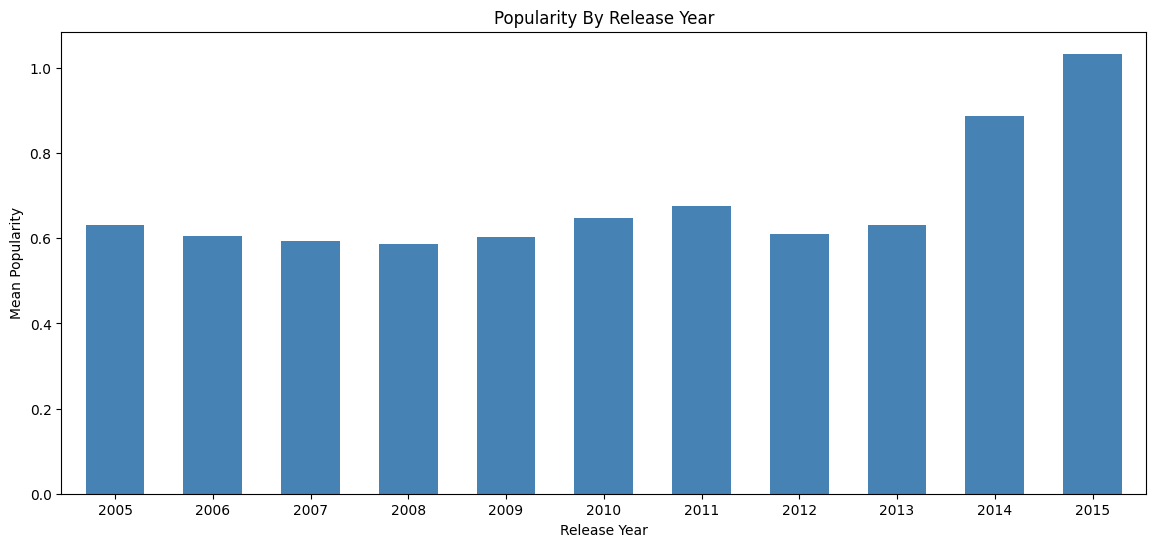

In [24]:
Plot(movies_from_2005_to_2015_df, 'release_year', 'popularity')

Mean popularity didn't change much until 2014 and 2015. 

#### Research Question 1 Follow up:

It seems that the vote average is about the same across all the years. The vote count increased over time. Movie popularity in both 2014 and 2015 was the highest of any other year.

### Research Question 2: Which genres generated the most revenue?

In [25]:
df.genres = df.genres.str.split('|')
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,119,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,"[Action, Adventure, Science Fiction, Fantasy]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,137,"[Action, Crime, Thriller]",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [26]:
df_genres = df.explode('genres')
df_genres_sorted = df_genres.sort_values(['budget'])
df_genres.head(8)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Adventure,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Science Fiction,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


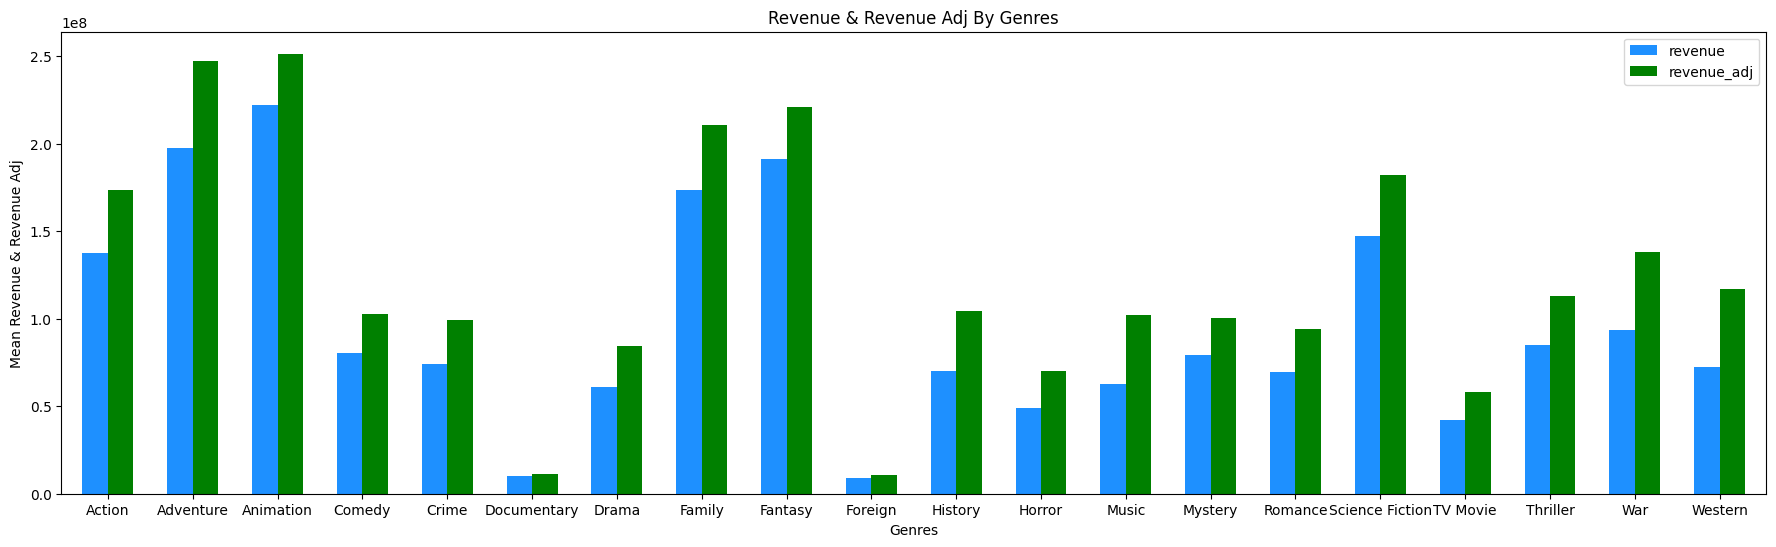

In [27]:
Plot(df_genres,'genres',['revenue', 'revenue_adj'], figsize=[22,6],color=('DodgerBlue','Green'))

Action, Adventure, Animation, Family, Fantasy, and Science Fiction have made noticeably more revenue than the other genres.

#### Research Question 2 Follow up:

Adventure, Fantasy, Animation, Family, Action, and Science Fiction made more revenue than the other genres. Both Adventure and Fantasy broke the $100,000,000 barrier.

### Research Question 3: Which genres have the highest budgets?

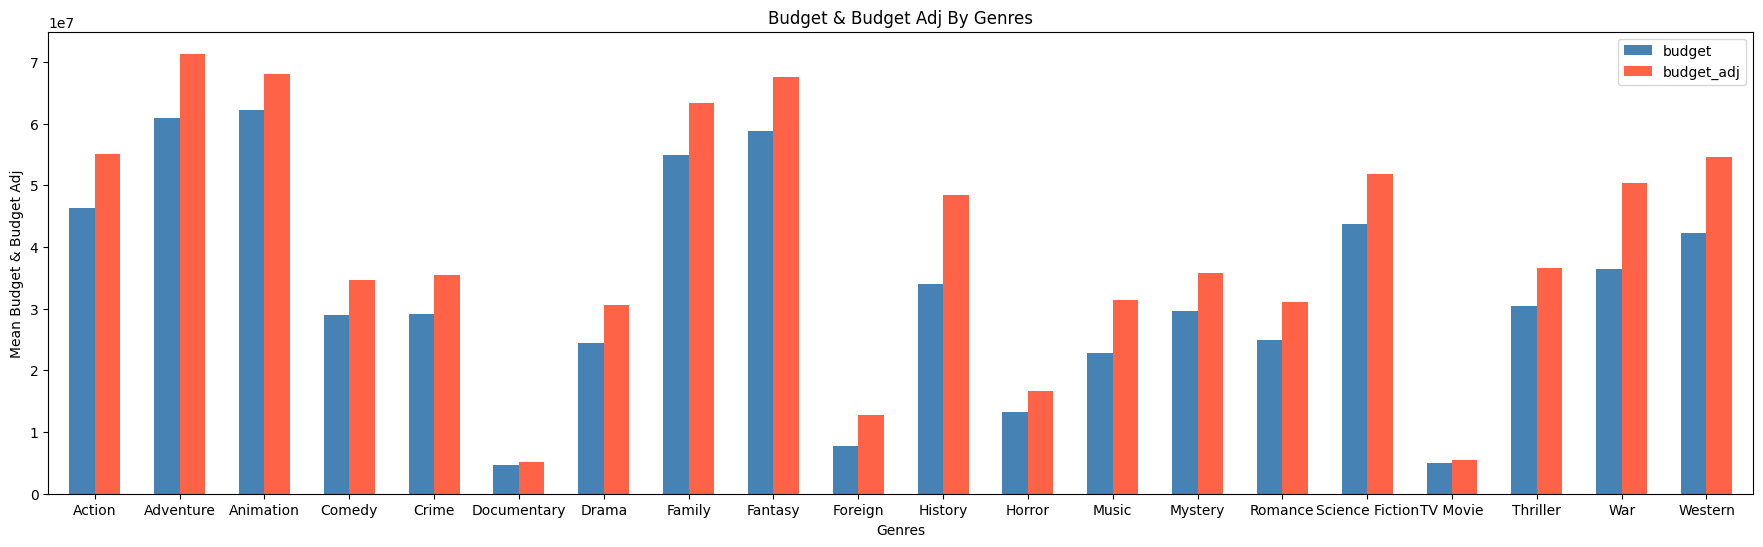

In [28]:
Plot(df_genres,'genres',['budget', 'budget_adj'], figsize=[22,6], color=('Steelblue', 'Tomato'))

Adventure, Animation, and Fantasy were the top 3 genres with the highest budgets. Despite War, Western, History, and Thriller genres not making a lot of revenue, they did have budgets close to Action and Science Fiction.

#### Research Question 3 follow up:

Adventure, Fantasy, Action, Science Fiction, and Family had the top 5 highest budgets.

### Research Question 4: Is there a correlation between Runtime and Revenue?

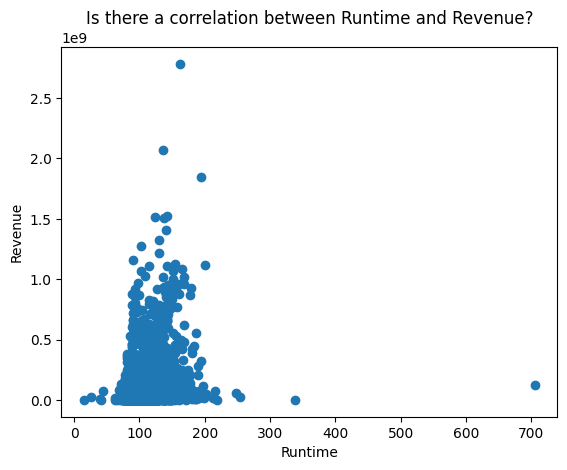

In [29]:
runtime1 = np.array(df['runtime'])
revenue1 = np.array(df['revenue'])
plt.scatter(runtime1, revenue1)
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.title('Is there a correlation between Runtime and Revenue?')
plt.show()

It's hard to see the distribution graph with the outliers. I'm going to redo this without the outliers.

In [30]:
runtime_revenue_df = df.query('runtime <= 300')
runtime = np.array(runtime_revenue_df['runtime'])
revenue = np.array(runtime_revenue_df['revenue'])

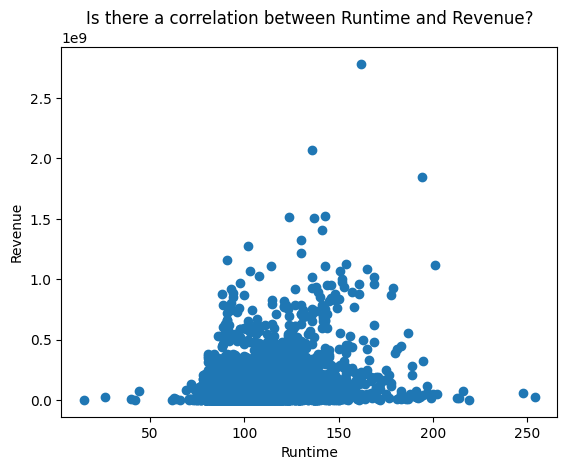

In [31]:
plt.scatter(runtime, revenue)
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.title('Is there a correlation between Runtime and Revenue?')
plt.show()

It seems that there is no correlation between Runtime and revenue.

In [32]:
runtime_revenue_df.corr(numeric_only=True)

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.480344,0.629320,0.184583,0.800789,0.211793,0.090462,0.435602,0.561754
budget,0.480344,1.000000,0.688536,0.279712,0.580549,0.090854,0.215058,0.959101,0.533466
revenue,0.629320,0.688536,1.000000,0.264021,0.764112,0.206871,0.121488,0.657535,0.904998
runtime,0.184583,0.279712,0.264021,1.000000,0.212246,0.156386,-0.152183,0.350263,0.293324
vote_count,0.800789,0.580549,0.764112,0.212246,1.000000,0.255861,0.108458,0.523856,0.666486
vote_average,0.211793,0.090854,0.206871,0.156386,0.255861,1.000000,-0.120441,0.111160,0.242377
release_year,0.090462,0.215058,0.121488,-0.152183,0.108458,-0.120441,1.000000,0.036082,-0.099364
budget_adj,0.435602,0.959101,0.657535,0.350263,0.523856,0.111160,0.036082,1.000000,0.570410
revenue_adj,0.561754,0.533466,0.904998,0.293324,0.666486,0.242377,-0.099364,0.570410,1.000000


#### Research Question 4 Follow-Up:

There seems to be little correlation between revenue and runtime. The correlation between revenue and runtime is 0.36 according to the table.

### Research Question 5: What is the average runtime of each genre?

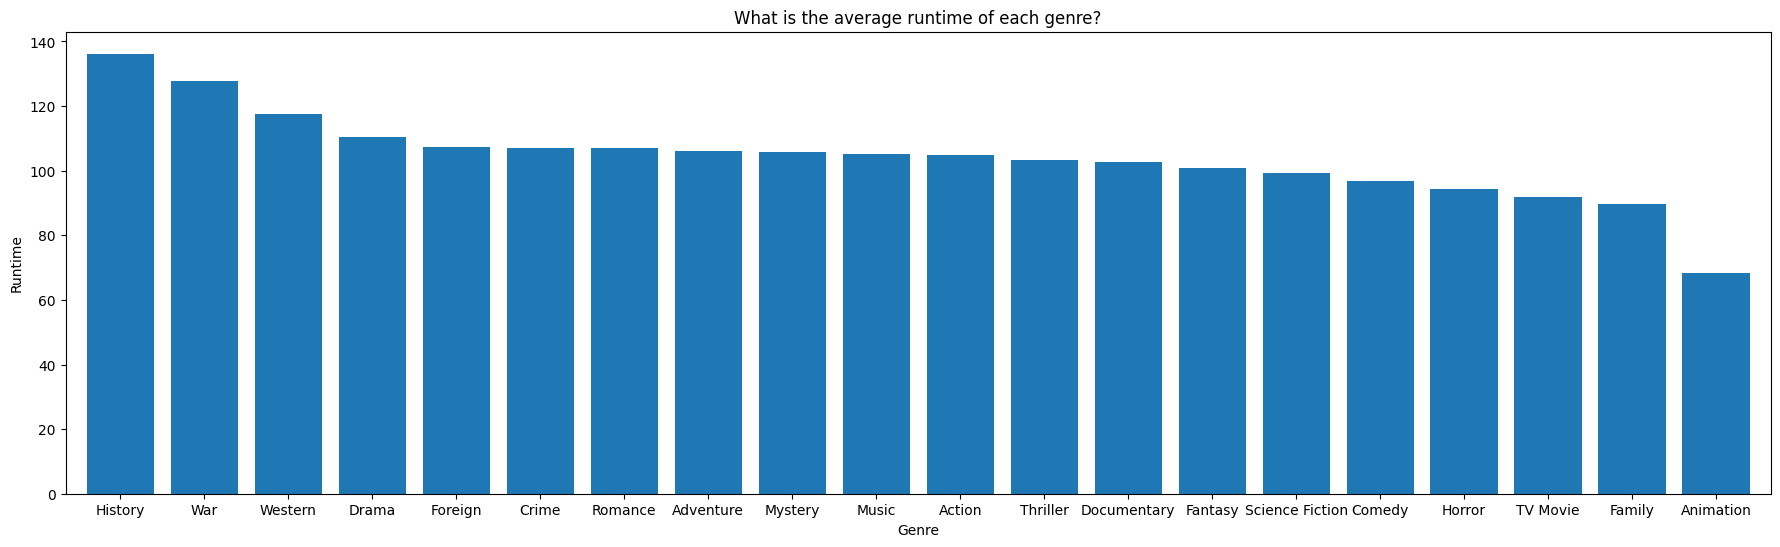

In [33]:
df_genres.groupby(['genres'])['runtime'].mean().sort_values(ascending=False).plot.bar(figsize=[22, 6], rot=0,width=0.8);
plt.xlabel('Genre')
plt.ylabel('Runtime')
plt.title('What is the average runtime of each genre?')
plt.show()

History and War averaged over 120 minutes of runtime. Animation had the lowest runtime.

In [34]:
np.mean(df_genres['runtime'])

102.80040808755334

#### Research Question 5 Follow-Up:

History, War, and Western movies have the highest runtimes. Animation has the lowest with approximately 70 minutes.

<a id='conclusions'></a>
## Conclusions

In conclusion, from 2005-2015,  vote average remained the same. Vote count was highest in 2014-15, same with popularity. Adventure, Fantasy, Action, and Science Fiction made a lot of revenue. Adventure, Fantasy, Action, Science Fiction, and Family had the top 5 highest budgets. There was no correlation between runtime and revenue with a correlation of 0.26.

#### Limitations from dataset:
<ul>
<li>There were 23 null values in the genres column</li>
<li>5696 rows had 0 budget and 6016 had 0 revenue</li>
</ul>